In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("myntra/myntra202305041052.csv")

In [10]:
df.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


In [11]:
df.shape

(1060213, 11)

In [13]:
df.dtypes

id               int64
name            object
img             object
asin            object
price          float64
mrp            float64
rating         float64
ratingTotal      int64
discount         int64
seller          object
purl            object
dtype: object

In [14]:
df.describe()

,id,price,mrp,rating,ratingTotal,discount
count,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06
mean,5.301070e+05,1.536235e+03,2.668379e+03,1.060150e+00,4.189618e+01,1.496420e+02
std,3.060573e+05,3.051140e+03,3.877900e+03,1.829632e+00,7.476645e+02,5.648781e+02
min,1.000000e+00,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.650540e+05,4.990000e+02,9.990000e+02,0.000000e+00,0.000000e+00,1.500000e+01
50%,5.301070e+05,8.110000e+02,1.780000e+03,0.000000e+00,0.000000e+00,5.000000e+01
75%,7.951600e+05,1.497000e+03,2.999000e+03,2.800000e+00,3.000000e+00,6.800000e+01
max,1.060213e+06,2.575000e+05,2.575000e+05,5.000000e+00,7.640000e+04,1.999600e+04


In [15]:
df1 = df.copy()

In [16]:
df1.drop(['img','asin','id'],axis=1,inplace=True)

In [17]:
df1.head()

,name,price,mrp,rating,ratingTotal,discount,seller,purl
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


In [18]:
df1.rename(columns={'ratingTotal':'verified_consumers','seller':'brand_name','purl':'url'},inplace = True)
df1.head()

,name,price,mrp,rating,verified_consumers,discount,brand_name,url
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


In [19]:
df1.isna().sum()

name                  0
price                 0
mrp                   0
rating                0
verified_consumers    0
discount              0
brand_name            0
url                   0
dtype: int64

In [20]:
df1['category']=df1['url'].apply(lambda x : x.split('/')[-5])

In [21]:
df1.head()

,name,price,mrp,rating,verified_consumers,discount,brand_name,url,category
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...,tshirts
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...,tshirts
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...,tshirts
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts


In [22]:
df1.category.unique()

array(['tshirts', 'shorts', 'shirts', 'tops', 'dresses', 'jeans',
       'co-ords', 'tights', 'leggings', 'jumpsuit', 'trousers',
       'track-pants', 'shrug', 'jewellery-set', 'sunglasses', 'ring',
       'hair-accessory', 'belts', 'bath-and-body-gift-set', 'earrings',
       'anklet', 'necklace-and-chains', 'bangle', 'handbags', 'bracelet',
       'mangalsutra', 'body-wash-and-scrub', 'kurtas', 'sarees',
       'lehenga-choli', 'kurta-sets', 'ethnic-dresses', 'kurtis',
       'smart-watches', 'watch-gift-set', 'watches', 'briefs',
       'lingerie-set', 'churidar', 'swimwear-cover-up-top', 'shapewear',
       'flip-flops', 'heels', 'flats', 'sports-shoes', 'casual-shoes',
       'bra', 'sweatshirts', 'socks', 'swimwear', 'nightdress',
       'lounge-pants', 'lingerie-accessories', 'night-suits',
       'baby-dolls', 'lounge-shorts', 'highlighter-and-blush',
       'eyeshadow', 'lipstick', 'eyebrow-enhancer', 'nail-essentials',
       'face-moisturisers', 'shampoo-and-conditioner',
 

In [23]:
df1.drop(['url'],axis=1,inplace=True)
df1.head()

,name,price,mrp,rating,verified_consumers,discount,brand_name,category
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,tshirts
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,tshirts
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,tshirts
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,tshirts
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,tshirts


In [24]:
df1.duplicated().sum()

454987

In [27]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

In [29]:
def discount_percent(x):
    return (100*x[1]//x[0])

df1.loc[df1['discount']>90,'discount']=df1.loc[
        df1['discount']>90,['mrp','discount']].apply(discount_percent,axis=1)

In [31]:
df1.discount.unique()

array([59, 45, 54, 73, 86, 50, 60, 40, 42, 75, 55, 58,  0, 30, 65, 10, 18,
       35, 70, 20, 66, 62, 25, 28,  5, 67, 68, 38, 36, 47, 69, 72, 80, 61,
       85, 82, 84, 88, 77, 90, 48, 56, 41, 76, 63, 57, 78, 64, 52, 53, 33,
       22, 71, 16, 15, 49, 46, 13, 81, 79,  6, 74, 83, 51, 32,  2, 37,  4,
        8,  3, 19, 44, 34, 26,  7, 27,  9, 43, 87, 29, 21, 14, 23, 17, 24,
       89, 12, 11, 31, 39,  1], dtype=int64)

In [32]:
df1.head()

,name,price,mrp,rating,verified_consumers,discount,brand_name,category
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,tshirts
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,tshirts
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,tshirts
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,tshirts
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,tshirts


In [39]:
df1.describe()

,price,mrp,rating,verified_consumers,discount
count,605226.000000,605226.000000,605226.000000,605226.000000,605226.000000
mean,1644.716183,2773.463145,1.469375,52.937359,39.878318
std,3405.981566,4279.305315,2.007172,801.149303,26.593262
min,25.000000,25.000000,0.000000,0.000000,0.000000
25%,509.000000,999.000000,0.000000,0.000000,15.000000
50%,839.000000,1799.000000,0.000000,0.000000,45.000000
75%,1499.000000,2997.000000,4.000000,8.000000,62.000000
max,257500.000000,257500.000000,5.000000,76400.000000,90.000000


In [40]:
avg, std = df1.price.mean(), df1.price.std()

In [41]:
higher_limit = avg + 3*std
higher_limit

11862.66088199382

In [42]:
lower_limit = avg - 3*std
lower_limit

-8573.228516860792

In [43]:
df1[df1.price>higher_limit]

,name,price,mrp,rating,verified_consumers,discount,brand_name,category
152,Kalamkari Tussar Jute Silk Saree,22899.0,45798.0,0.0,0,50,Unnati Silks,sarees
235,Women Silecon Textured Watch,43000.0,43000.0,0.0,0,0,TISSOT,watches
237,Unisex Leather Watch,66500.0,66500.0,0.0,0,0,TISSOT,watches
424,SPORTSWEAR Sweatshirt,14999.0,14999.0,0.0,0,0,ADIDAS,sweatshirts
436,SPORTSWEAR HOODIE Sweatshirts,14999.0,14999.0,0.0,0,0,ADIDAS,sweatshirts
...,...,...,...,...,...,...,...,...
1057682,Raw Silk Kurta,13000.0,13000.0,0.0,0,0,Masaba,kurtas
1057696,Women Ethnic Motifs Printed Crepe Kurta,13000.0,13000.0,0.0,0,0,Masaba,kurtas
1058624,Solid Soft-Sided Cabin Trolley Suitcase,14625.0,22500.0,0.0,0,35,RONCATO,trolley-bag
1059352,Textured Messenger Bag,18395.0,18395.0,0.0,0,0,Hidesign,messenger-bag


<Axes: >

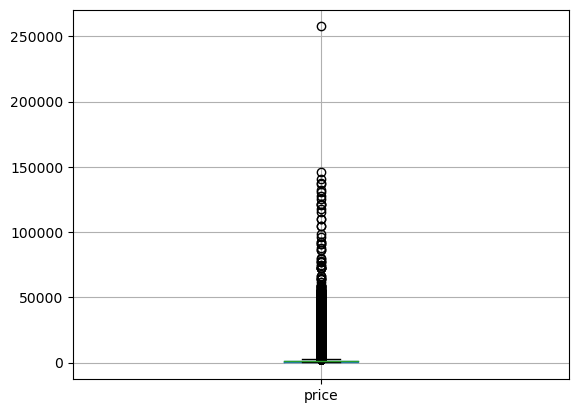

In [46]:
df1.boxplot('price')

In [74]:
df2 = df1[df1.price>50000]


In [75]:
df2.brand_name.value_counts()

brand_name
CANDERE A KALYAN JEWELLERS COMPANY    50
Versace                               34
TISSOT                                13
MISSONI                               10
MELORRA                               10
D1 Milano                              7
Mathey-Tissot                          4
Victorinox                             2
GC                                     2
Tom Ford                               2
Chopard                                1
SEIKO                                  1
Tasva                                  1
flaher                                 1
Masaba                                 1
Name: count, dtype: int64

<Axes: xlabel='category'>

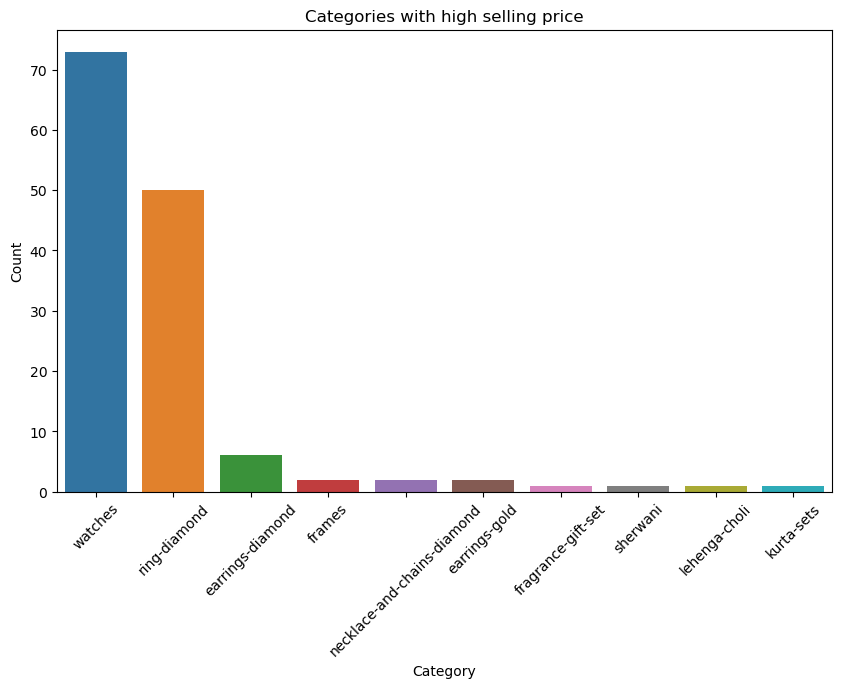

In [77]:
category_counts = df2['category'].value_counts()

plt.figure(figsize=(10, 6)) 
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Categories with high selling price')
plt.xticks(rotation=45)
plt.show()

In [80]:
df3 = df1.category.value_counts().reset_index()
h= df3.head(10)
t = df3.tail(10)

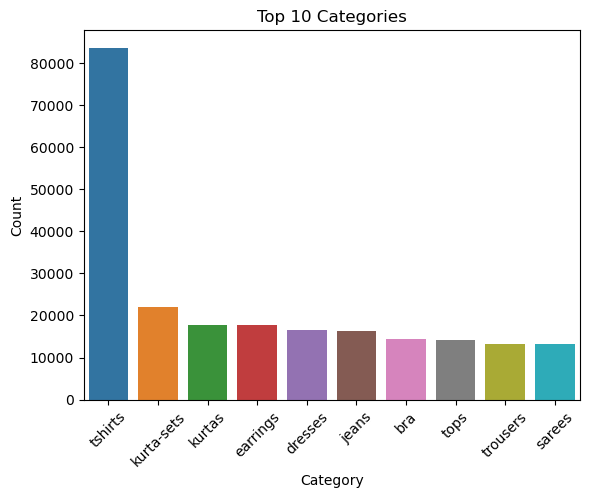

In [85]:
sns.barplot(x='category', y='count', data=h)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Categories')
plt.xticks(rotation=45)
plt.show()

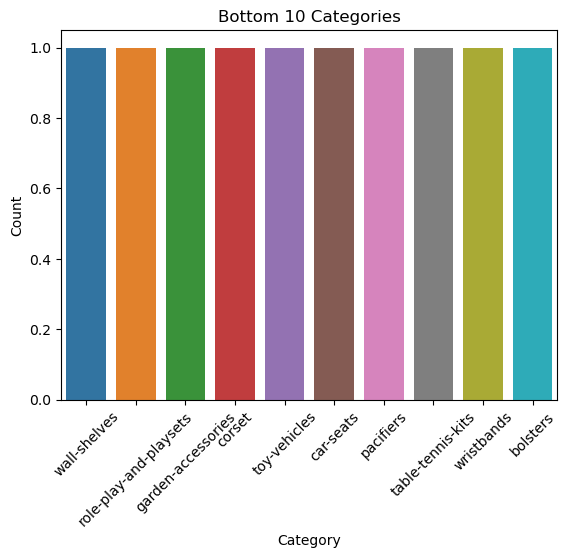

In [86]:
sns.barplot(x='category', y='count', data=t)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bottom 10 Categories')
plt.xticks(rotation=45)
plt.show()

In [93]:
df4 = df1.brand_name.value_counts().reset_index()


In [97]:
h1 = df4.head(10)

Index(['brand_name', 'count'], dtype='object')

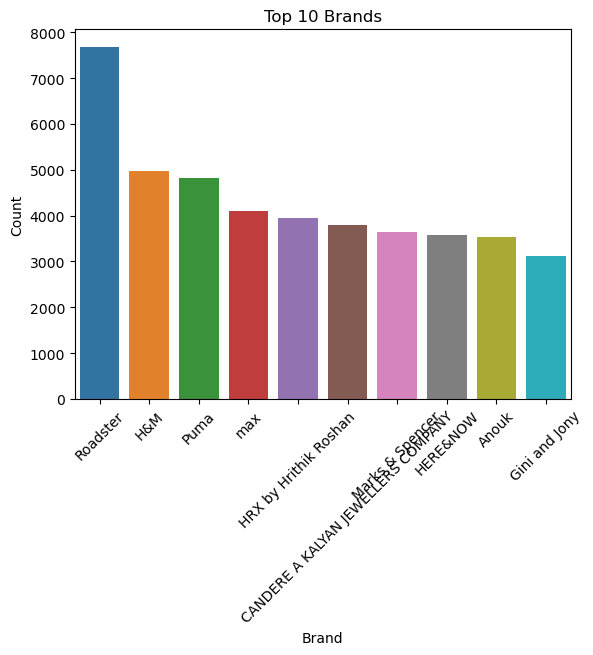

In [98]:
sns.barplot(x='brand_name', y='count', data=h1)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 10 Brands')
plt.xticks(rotation=45)
plt.show()